# Classification Model : House Grade Prediction

## Business Objective:
    Build a predictive model to determine the Grade of house (The grades are A,B,C,D, and E)

### Importing Required Library 

In [1]:
import pandas as pd # to work with DataFrame 
import numpy as np # to deal with numeric problem
import matplotlib.pyplot as plt #to visualize 
import matplotlib as mat                    # to visualize 
import seaborn as sns   # to visualize
from sklearn import preprocessing # preprocess
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # to encode model
from sklearn.model_selection import train_test_split # to split th data
from sklearn.linear_model import LogisticRegression #model
from sklearn.tree import DecisionTreeClassifier #model
from sklearn.svm import SVC #model
from sklearn.ensemble import RandomForestClassifier #ensambling tree 
from sklearn.metrics import confusion_matrix ,accuracy_score, recall_score,f1_score,precision_score #to get the score of classifier
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
df = pd.read_csv('Project2_Classification_HouseGrade_Data_Project.csv')

In [3]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [4]:
df.shape

(3000, 14)

In [5]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [6]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### Checking For Null Values

In [7]:
df.isna().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

### No null value is present in the dataset 

### Separating Categorical and Numerical Variables

In [8]:
categorical = []
continuous = []
for column in df.columns:                # looping on the number of columns
    if df[column].nunique() < 40:       # nunique:  returns unique values in the column,
                                        #here 43 is the hyperparamter and can be changed
        categorical.append(column)
    else:
        continuous.append(column)
# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical    continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


# EDA

### Univaraiate

#### Exploring House Grade

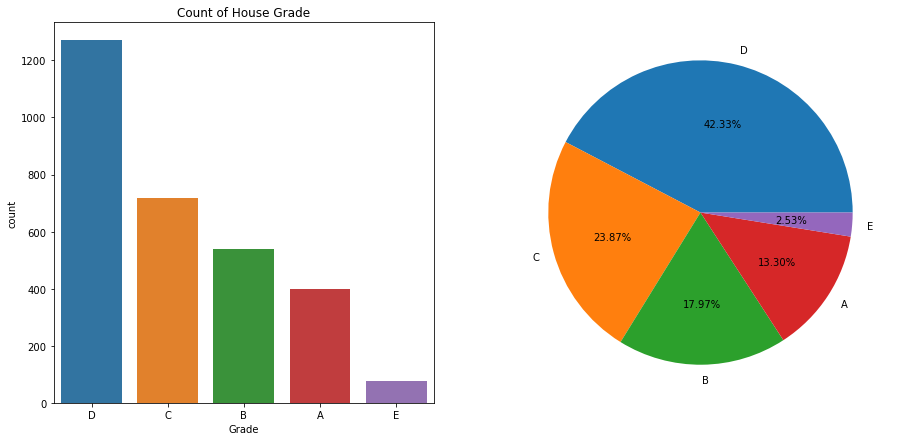

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of House Grade")                  # Set the title of the graph
percentage = df["Grade"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Grade"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df["Grade"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### Interpretation: 
        As we can see from the above charts most of the houses in our dataset belong to D Grade and least in E Grade 

#### Exploring all the Categorical Columns

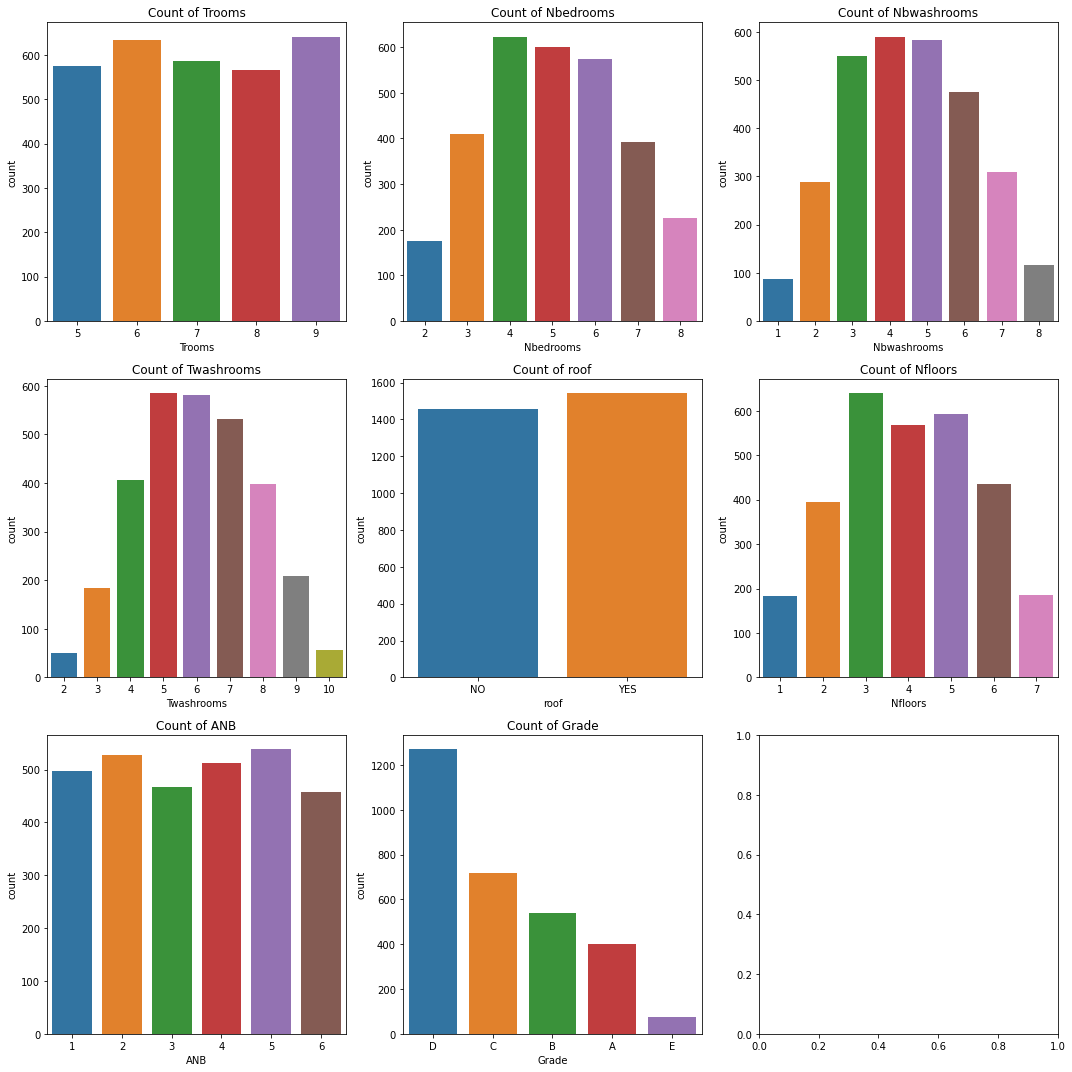

In [10]:
con_df=df[categorical] # create dataframe for all numeric type
con_cols=con_df.columns # taking colums 
num_cols=3  # how many column we want in subplot 
num_rows=int(len(con_cols)/num_cols)+1     #rows for subplot
figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(15,15))
for col ,ax in zip(con_cols,axes.flatten()):  #used flatten to make it one dimensinol
    sns.countplot(x = con_df[col], ax = ax)
    ax.set_title("Count of {0}".format(col))
plt.show()

### Interpretation:
    Rooms = Most of the houses in data Rooms is equally distributed between 6-9
    Bedrooms= Most of the houses has 4-7 rooms
    Washrooms = Most of the houses has 3-4 washroom very less houses with one washrooom
    Floors = Majority of the houses has two floors in the given dataset

#### Exploring Categorical Columns Using Pie Chart

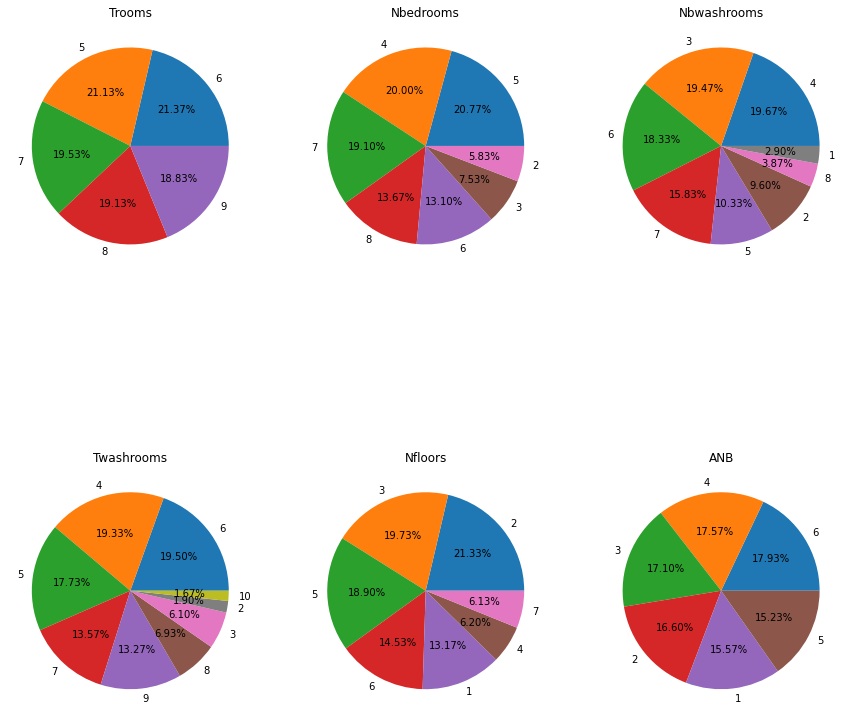

In [11]:
con_df.drop(['roof','Grade'],axis=1,inplace=True)
con_cols=con_df.columns
figs,axes =plt.subplots(2,3,figsize=(15,15))
for i in range(6):
    axes[i//3,i%3].pie(con_df[con_cols[i]].value_counts(),labels =list(con_df[con_cols[i]].unique()) , autopct= "%0.2f%%")
    axes[i//3,i%3].set_title(con_cols[i])

### Interpretation:
    Rooms = Most of the houses in data Rooms is equally distributed between 6-9
    Bedrooms= Most of the houses has 4-7 rooms
    Washrooms = Most of the houses has 3-4 washroom very less houses with one washrooom
    Floors = Majority of the houses has two floors in the given dataset

#### Exploring all the Numeric Columns

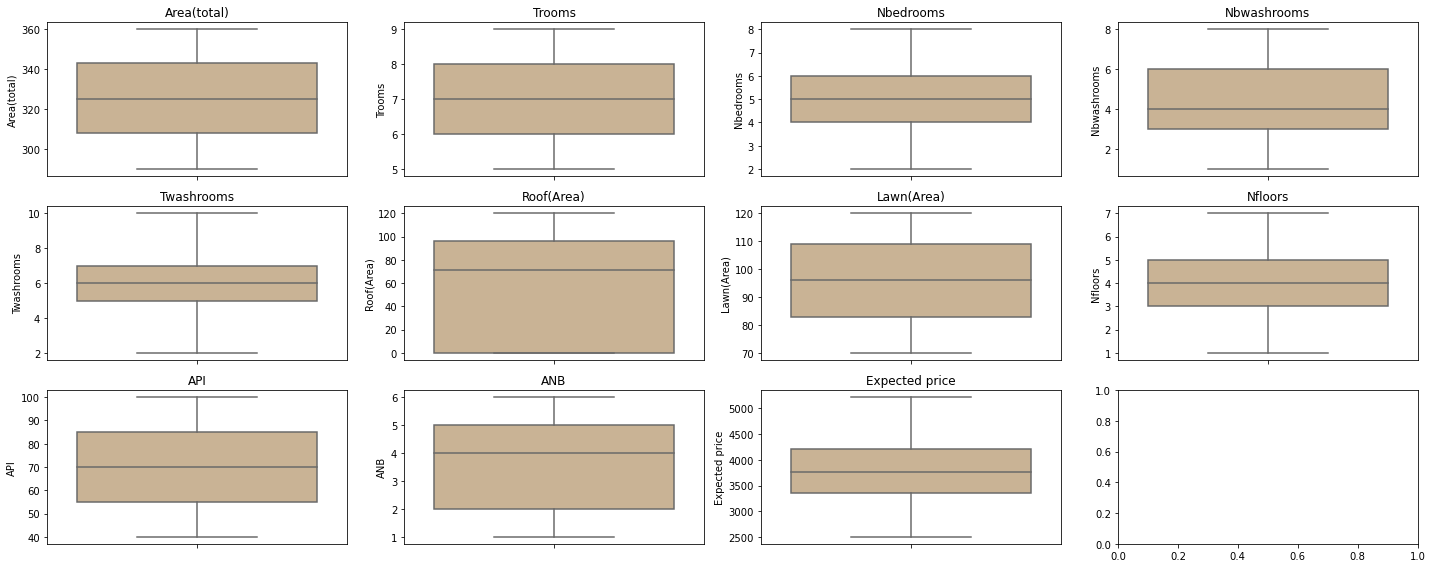

In [12]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=df.select_dtypes(include=numerics)# create dataframe for all numeric type
con_df.drop('Id',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
num_cols=4  # how many column we want in subplot 
n_bins=20 # bin size for histogram 
num_rows=int(len(con_cols)/num_cols)+1   #rows for subplot

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,8))

for col ,ax in zip(con_cols,axes.flatten()):
    sns.boxplot(y=con_df[col],ax=ax,color='tan')
    ax.set_title(col)
plt.show()

### Interpretation:
    Area= Area of house is between 300-350
    Rooms = Most of the houses in data Rooms is equally distributed between 6-9
    Bedrooms= Most of the houses has 4-7 rooms
    Washrooms = Most of the houses has 3-4 washroom very less houses with one washrooom
    Floors = Majority of the houses has two floors in the given dataset
    Lawn(Area) = Lawn area for most of the houses is in between 80-110

## Bivariate

#### Exploring Numeric columns with respect to target variable Grade of House 

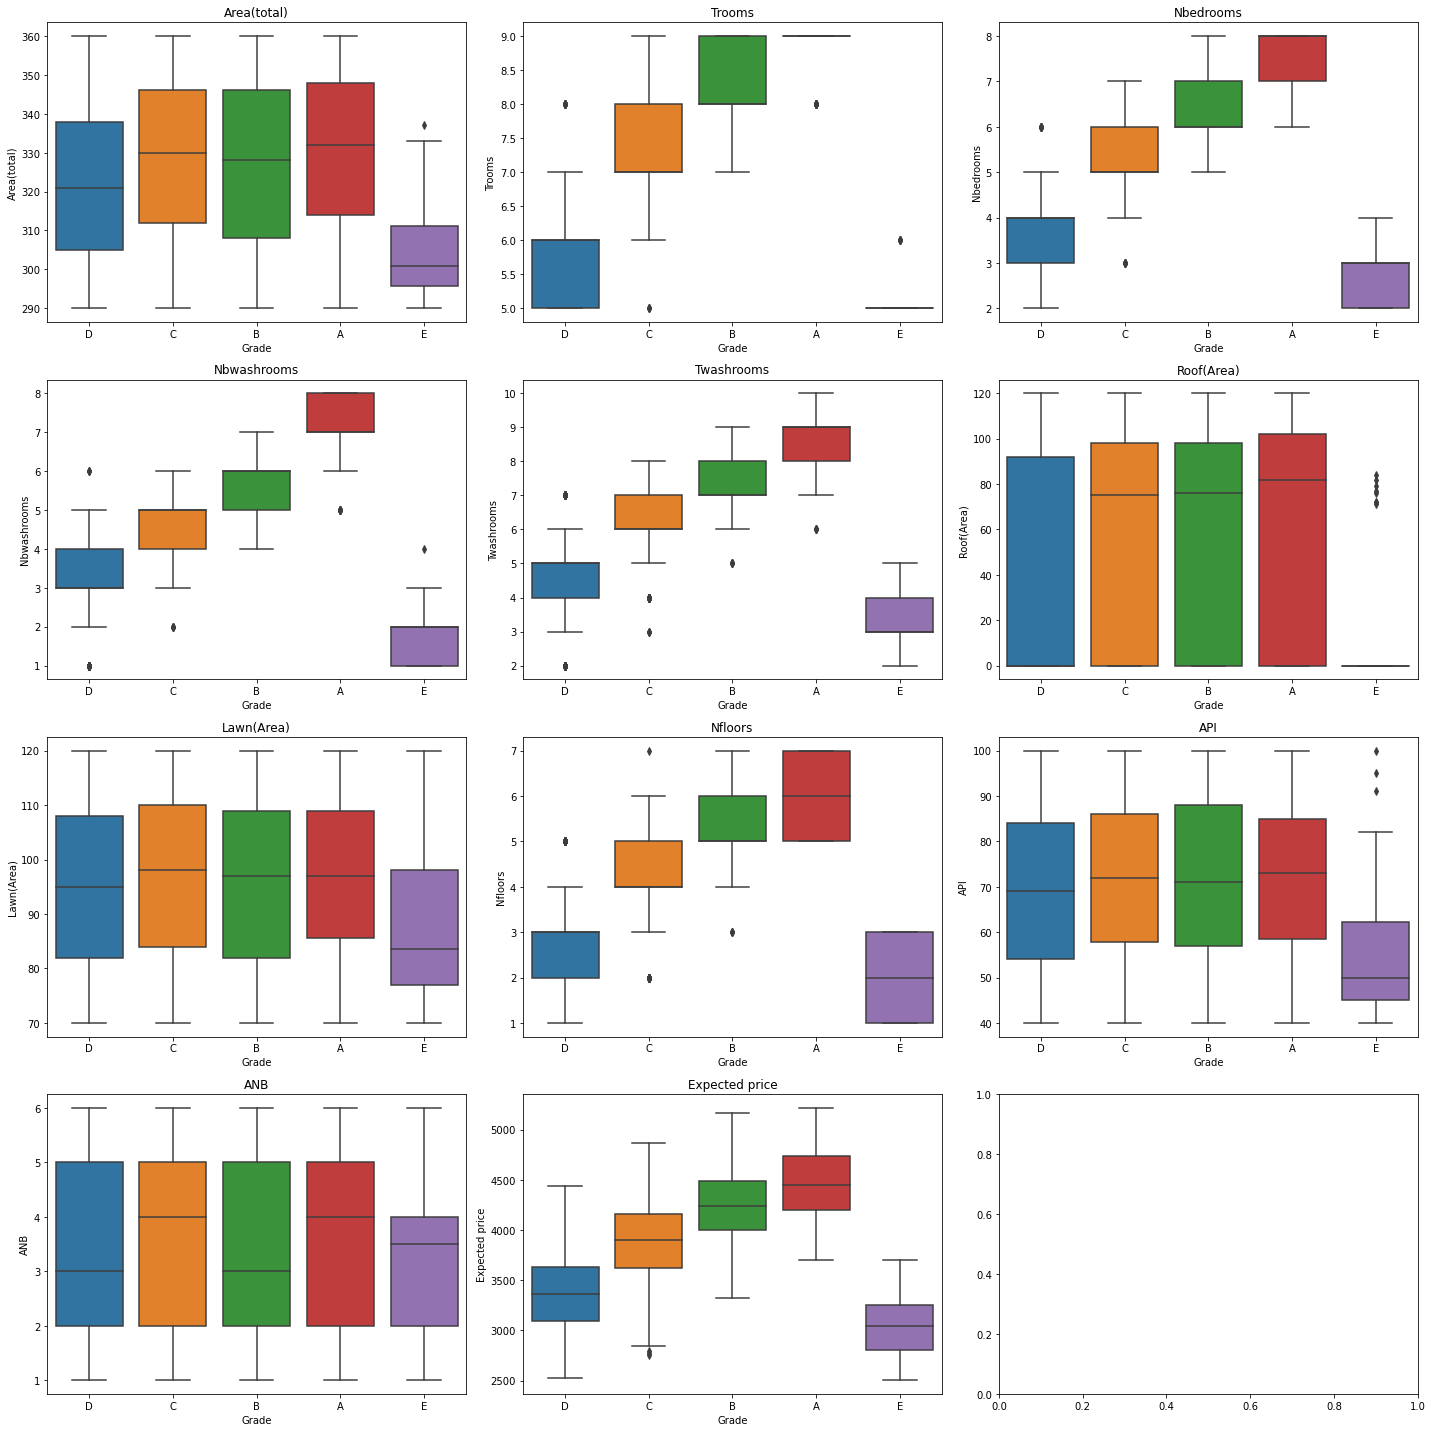

In [13]:
numerics=['int16','int32','int64','float16','float32','float64'] #list of all numeric type in daataframe
con_df=df.select_dtypes(include=numerics)# create dataframe for all numeric type
con_df.drop('Id',axis=1,inplace=True)
con_cols=con_df.columns # taking colums 
con_cols
figs,axes =plt.subplots(4,3,tight_layout=True,figsize=(20,20))
for col ,ax in zip(con_cols,axes.flatten()):
    sns.boxplot(data = df,y=df[col], x=df['Grade'],ax=ax)
    ax.set_title(col)
plt.show()

### Interpretation:
* Area: In Grade A, B, C the area comes between 310-350, but for E grade house area is less than 300

* Rooms: Number of Rooms increases as Grade increases most of the A grade house has 9 rooms and E grade has 5 rooms

* Bedrooms: Number of Bedrooms increases as Grade increases most of the A grade house has 7-8 bedrooms and E grade has 2-3 bedrooms

* Bedroom Attached Washrooms: Number of Attached Washrooms increases as Grade increases most of the A grade house has 7-8 Washrooms and E grade has 1-2 Washrooms

* Washrooms: Number of Washrooms increases as Grade increases most of the A grade house has 8-9 Washrooms and E grade has 3-4 Washrooms

* Roof area: Most of the houses has almost same roof area except E grade because most of the E grade houses doesn’t have the roofs 

* Lawn area: Lawn area of E grade houses is comparatively less than other grade houses

* Total Floors: Number of Total Floors increases as Grade increases A grade house has 5-7 floors and E grade has 1-3 floors

* Air pollution index level: Air pollution index level of E grade houses is comparatively less than other grade houses

* Average number belonging: Average number belonging of E grade houses is comparatively less than other grade houses

* Expected Price: Expected price increases as Grade increases A grade house price is in between 4000-4500 and E grade price is somewhere around 3000

#### Exploring Roofs with respect to Grade of House

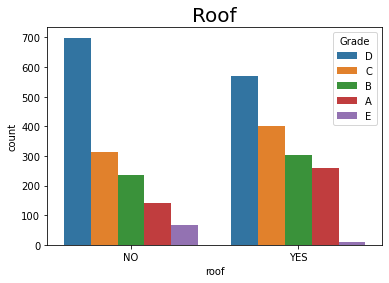

In [14]:
plt.title('Roof', fontsize='20')
sns.countplot(data = df,x=df['roof'],hue='Grade');

### Interpretation:
    Roof: Houses with roofs is comparatively less then without roof there are very less E grade houses with roof

### Multivariate

#### Exploring Expected price and total number rooms with respect to target variable Grade of House 

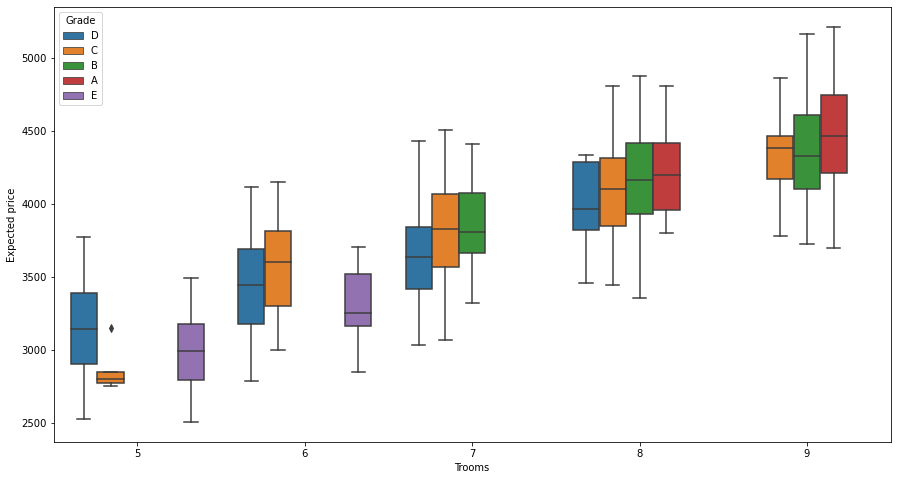

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df,x='Trooms',y='Expected price' ,hue='Grade')
plt.show()

### Interpretation: 
    Price is less if the number of total room is house is less mostly these houses comes in  C, D grade and price increase as number of rooms increase if the number of rooms in house is nine mostly they are from Grade A, B, C and price is more than 4k 

#### Exploring House with or without Roofs and total ares with respect to target variable Grade of House

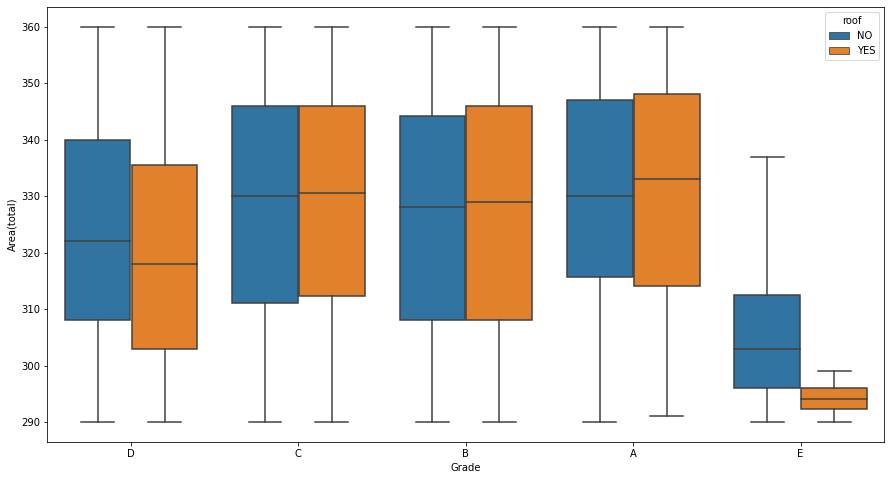

In [16]:
plt.figure(figsize=(15,8)) #to plot graph 
sns.boxplot(data = df,x='Grade',y='Area(total)' ,hue='roof')
plt.show()

### Interpretation:
    Most of the house have same area range between 300-350 with or without roof except E grade house there area is less then 310 for without roof and less than 290 with roof
    

# Preparing Data For Model Buildng

### Label Encoding

In [17]:
obj_data = df.select_dtypes(include='object') # to encode all variable with object type creating a new df
encoder=LabelEncoder()
for i in obj_data:
    df[i] = encoder.fit_transform(df[i])

In [18]:
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3


### Scalling of Data

In [19]:
X = df.iloc[:,1:13] # WE ARE TAKING IT FROM ONE BECAUSE WE DON'T NEED ID FOR MODEL Building
y = df.iloc[:,13]
scaler = MinMaxScaler() # to scale the data data between 0-1
X= pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
0,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251
1,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944
2,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702
3,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301
4,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732


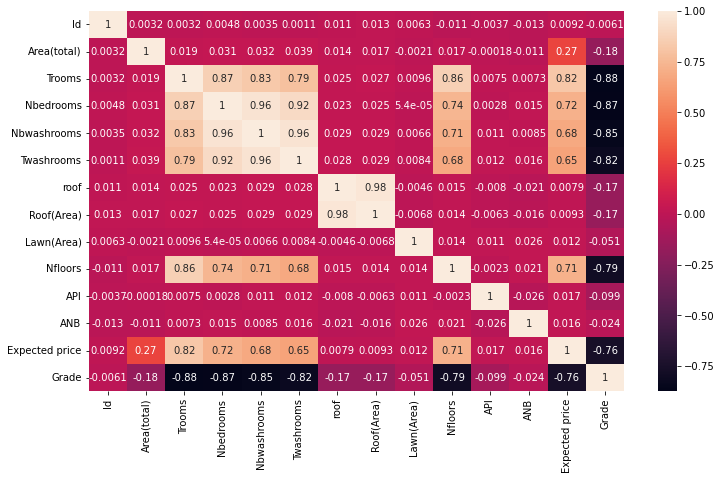

In [20]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True);

### From the Above Correlation we can Identify ID and ANB in not that correlating with Grade of House so we will drop those Features from our Inputs Variables(X)

In [21]:
X.drop(['ANB'], inplace=True, axis=1)

# Test Train Split

In [22]:
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.7)

## LDA

In [23]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# v=[]
# for i in range (1,5):
#     lda = LinearDiscriminantAnalysis(n_components=i)
#     lda.fit(X_train,y_train)
#     v.append(np.sum(lda.explained_variance_ratio_))
# plt.plot(range(1,5), v)
# plt.grid()
# plt.xlabel('Number of components')
# plt.ylabel('Variance Explained')

In [24]:
# lda = LinearDiscriminantAnalysis(n_components=3)
# x_tr=lda.fit_transform(X_train,y_train)
# x_te=lda.transform(X_test)

In [25]:
# x_tr

### 1st Model DecisionTreeClassifier

#### Model Building

In [26]:
dt = DecisionTreeClassifier(random_state=1) # crating classifier 
dt.fit(X_train,y_train) # fitting the train data

DecisionTreeClassifier(random_state=1)

#### Prediting Results

In [27]:
DT_pred= dt.predict(X_test) # predicting test data
DT_pred1= dt.predict(X_train) # predicting train data

#### Evaluation

In [28]:
c_matrix =confusion_matrix(y_test,DT_pred) #Building confusion matrix
c_matrix

array([[ 88,  17,   0,   0,   0],
       [ 16, 121,  16,   0,   0],
       [  0,  10, 157,  37,   0],
       [  0,   0,  22, 382,   9],
       [  0,   0,   0,  10,  15]], dtype=int64)

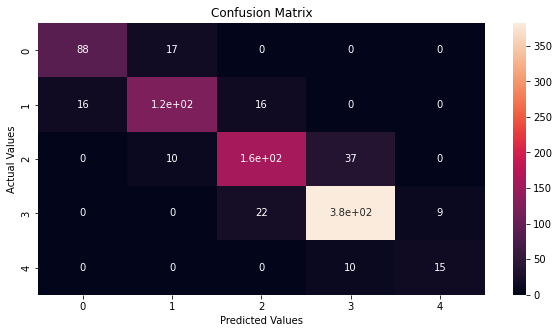

In [29]:
c_matrix = pd.DataFrame(c_matrix, columns=list(np.unique(DT_pred))) #create dataframe of matrix to create confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(c_matrix, annot=True) #using heatmap to visualize confusion matrix
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### Train Data Evaluation

In [30]:
a_s = accuracy_score(y_train,DT_pred1) # gives the accuracy of model how well our classifier
r_s = recall_score(y_train,DT_pred1, average ='macro' ) #to get the recall score used predefined function 
p_s = precision_score(y_train,DT_pred1, average ='macro') #to get the precision_score used predefined function
f1_s = f1_score(y_train,DT_pred1, average ='macro') #to get the f1_score used predefined function
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 1.0
Recall_score is: 1.0
Precision_score is: 1.0
F1_score is: 1.0


#### Test Data Evaluation

In [31]:
a_s = accuracy_score(y_test,DT_pred) # gives the accuracy of model how well our classifier
r_s = recall_score(y_test,DT_pred, average ='macro' ) #to get the recall score used predefined function 
p_s = precision_score(y_test,DT_pred, average ='macro') #to get the precision_score used predefined function
f1_s = f1_score(y_test,DT_pred, average ='macro') #to get the f1_score used predefined function
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.8477777777777777
Recall_score is: 0.7846984443494912
Precision_score is: 0.7968585018585019
F1_score is: 0.7905335422108906


#### In the DecisionTreeClassifier we can see that our model has acuracy of 85% which shows how well our classfier is predicting the result, 
    Recall score is 81% which is telling us the friction which our classifier is predicting correct for all the sample (tp+fn), 
        
    Precision Score is 80% which is telling us the friction which our classifier is predicting correct for predicted samples(tp+fp), 

    F1_Score is 81% which is harmonic mean of Precision Score and Recall score it is used to check how well our model is. 

    we used macro average because most of our classes are balanced.

### 2nd Model SVC

#### Model Building

In [32]:
svc_model = SVC(random_state=1)

In [33]:
svc_model.fit(X_train,y_train)

SVC(random_state=1)

#### Predition

In [34]:
svc_model_pred=svc_model.predict(X_test)
svc_model_pred1=svc_model.predict(X_train)


#### Evaluation

In [35]:
c_matrix =confusion_matrix(y_test,svc_model_pred)
c_matrix

array([[ 92,  13,   0,   0,   0],
       [  4, 146,   3,   0,   0],
       [  0,   7, 194,   3,   0],
       [  0,   0,   4, 409,   0],
       [  0,   0,   0,   9,  16]], dtype=int64)

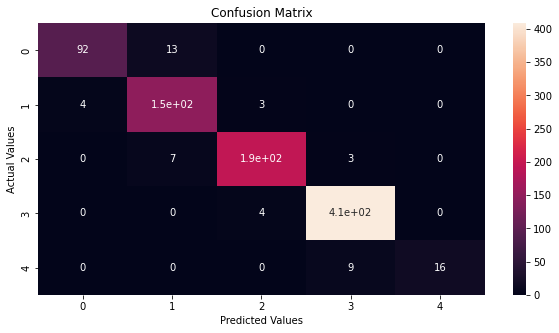

In [36]:
c_matrix = pd.DataFrame(c_matrix, columns=list(np.unique(DT_pred)))
plt.figure(figsize=(10,5))
sns.heatmap(c_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### Train Data Evaluation

In [37]:
a_s = accuracy_score(y_train,svc_model_pred1)
r_s = recall_score(y_train,svc_model_pred1, average ='macro' )
p_s = precision_score(y_train,svc_model_pred1, average ='macro')
f1_s = f1_score(y_train,svc_model_pred1, average ='macro')
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.9614285714285714
Recall_score is: 0.9156500628135003
Precision_score is: 0.9697543455580642
F1_score is: 0.9381954335431585


#### Test Data Evalution

In [38]:
a_s = accuracy_score(y_test,svc_model_pred)
r_s = recall_score(y_test,svc_model_pred, average ='macro' )
p_s = precision_score(y_test,svc_model_pred, average ='macro')
f1_s = f1_score(y_test,svc_model_pred, average ='macro')
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.9522222222222222
Recall_score is: 0.8823468008672395
Precision_score is: 0.9549043944060711
F1_score is: 0.9100222462194866


#### In the SVC we can see that our model has acuracy of 94% which shows how well our classfier is predicting the result, 
    Recall score is 88% which is telling us the friction which our classifier is predicting correct for all the sample (tp+fn), 
        
    Precision Score is 93% which is telling us the friction which our classifier is predicting correct for predicted samples(tp+fp), 

    F1_Score is 91% which is harmonic mean of Precision Score and Recall score it is used to check how well our model is. 

    we used macro average because most of our classes are balanced.

## 3rd Model GaussianNB


#### Model Building

In [39]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(X_train,y_train)

GaussianNB()

#### Predition

In [40]:
GB_pred = NBclassifier.predict(X_test)
GB_pred1 = NBclassifier.predict(X_train)

#### Evaluation

In [41]:
c_matrix =confusion_matrix(y_test,GB_pred)
c_matrix

array([[ 83,  22,   0,   0,   0],
       [  9, 128,  16,   0,   0],
       [  0,  29, 155,  20,   0],
       [  0,   0,  51, 339,  23],
       [  0,   0,   0,   7,  18]], dtype=int64)

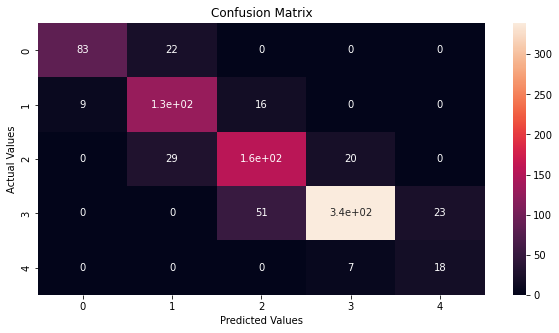

In [42]:
c_matrix = pd.DataFrame(c_matrix, columns=list(np.unique(DT_pred)))
plt.figure(figsize=(10,5))
sns.heatmap(c_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### Train Data Evaluation

In [43]:
a_s = accuracy_score(y_train,GB_pred1)
r_s = recall_score(y_train,GB_pred1, average ='macro' )
p_s = precision_score(y_train,GB_pred1, average ='macro')
f1_s = f1_score(y_train,GB_pred1, average ='macro')
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.8
Recall_score is: 0.7924394078779434
Precision_score is: 0.7427242713703354
F1_score is: 0.7620259460112208


#### Test Data Evaluation

In [44]:
a_s = accuracy_score(y_test,GB_pred)
r_s = recall_score(y_test,GB_pred, average ='macro' )
p_s = precision_score(y_test,GB_pred, average ='macro')
f1_s = f1_score(y_test,GB_pred, average ='macro')
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.8033333333333333
Recall_score is: 0.7855409327572836
Precision_score is: 0.7361419617129964
F1_score is: 0.7514449210863657


#### In the GaussianNB we can see that our model has acuracy of 79% which shows how well our classfier is predicting the result,
    Recall score is 79% which is telling us the friction which our classifier is predicting correct for all the sample (tp+fn), 

    Precision Score is 75% which is telling us the friction which our classifier is predicting correct for predicted samples(tp+fp), 

    F1_Score is 76% which is harmonic mean of Precision Score and Recall score it is used to check how well our model is. 

    we used macro average because most of our classes are balanced

###  4th Model RandomForestClassifier

#### Model Building

In [45]:
RFclassifier = RandomForestClassifier(random_state=1)
RFclassifier.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Prediction

In [46]:
RF = RFclassifier.predict(X_test)
RF1 = RFclassifier.predict(X_train)

#### Evaluation

In [47]:
c_matrix =confusion_matrix(y_test,RF)
c_matrix

array([[ 90,  15,   0,   0,   0],
       [ 12, 129,  12,   0,   0],
       [  0,   7, 183,  14,   0],
       [  0,   0,   7, 406,   0],
       [  0,   0,   0,  15,  10]], dtype=int64)

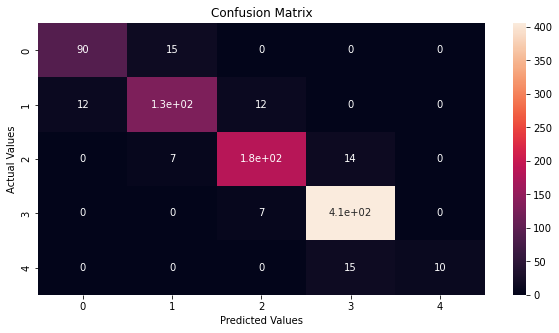

In [48]:
c_matrix = pd.DataFrame(c_matrix, columns=list(np.unique(DT_pred)))
plt.figure(figsize=(10,5))
sns.heatmap(c_matrix, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

#### Train Data Evaluation

In [49]:
a_s = accuracy_score(y_train,RF1)
r_s = recall_score(y_train,RF1, average ='macro' )
p_s = precision_score(y_train,RF1, average ='macro')
f1_s = f1_score(y_train,RF1, average ='macro')
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 1.0
Recall_score is: 1.0
Precision_score is: 1.0
F1_score is: 1.0


#### Test Data Evaluation

In [50]:
a_s = accuracy_score(y_test,RF)
r_s = recall_score(y_test,RF, average ='macro' )
p_s = precision_score(y_test,RF, average ='macro')
f1_s = f1_score(y_test,RF, average ='macro')
print('Accuracy is:' ,a_s)
print('Recall_score is:', r_s)
print('Precision_score is:', p_s)
print('F1_score is:' ,f1_s)

Accuracy is: 0.9088888888888889
Recall_score is: 0.7960779566063714
Precision_score is: 0.9151863008661598
F1_score is: 0.8297406003339655


#### In the RandomForestClassifier we can see that our model has acuracy of 90% which shows how well our classfier is predicting the result,
    Recall score is 81% which is telling us the friction which our classifier is predicting correct for all the sample (tp+fn), 

    Precision Score is 89% which is telling us the friction which our classifier is predicting correct for predicted samples(tp+fp), 

    F1_Score is 84% which is harmonic mean of Precision Score and Recall score it is used to check how well our model is. 

    we used macro average because most of our classes are balanced

# Model Selection: Comparision

#### 1st Model DecisionTreeClassifier

In [51]:
a_s_train = accuracy_score(y_train,DT_pred1)
a_s = accuracy_score(y_test,DT_pred)
print('Train Data Accuracy is:' ,a_s_train)
print('Test Data Accuracy is:' ,a_s)

Train Data Accuracy is: 1.0
Test Data Accuracy is: 0.8477777777777777


#### 2nd Model SVC

In [52]:
a_s_train = accuracy_score(y_train,svc_model_pred1)
a_s = accuracy_score(y_test,svc_model_pred)
print('Train Data Accuracy is:' ,a_s_train)
print('Test Data Accuracy is:' ,a_s)

Train Data Accuracy is: 0.9614285714285714
Test Data Accuracy is: 0.9522222222222222


#### 3rd Model GaussianNB

In [53]:
a_s_train = accuracy_score(y_train,GB_pred1)
a_s = accuracy_score(y_test,GB_pred)
print('Train Data Accuracy is:' ,a_s_train)
print('Test Data Accuracy is:' ,a_s)

Train Data Accuracy is: 0.8
Test Data Accuracy is: 0.8033333333333333


#### 4th Model RandomForestClassifier

In [54]:
a_s_train = accuracy_score(y_train,RF1)
a_s = accuracy_score(y_test,RF)
print('Train Data Accuracy is:' ,a_s_train)
print('Test Data Accuracy is:' ,a_s)

Train Data Accuracy is: 1.0
Test Data Accuracy is: 0.9088888888888889


#### Conclusion
As we can see 1st Model DecisionTreeClassifier and 4th Model RandomForestClassifier both are overfitted giving 100% accuracy on Train Data and 15-20% less accuracy on Test Data, Third Model GaussianNB is balanced but the score is bit less comparatively others so finally we go for **2nd Model SVC which giving us accuracy of 95% on both train and test samples**


# Final Prediction Using Best Model i.e - SVM

In [55]:
Final_Output = pd.Series(encoder.inverse_transform(list(svc_model_pred)))
Final_Output

0      C
1      D
2      D
3      C
4      D
      ..
895    C
896    C
897    D
898    D
899    A
Length: 900, dtype: object

# Features Importance

In [56]:
from sklearn.inspection import  permutation_importance

In [57]:
a = permutation_importance(svc_model,X_test,y_test).importances_mean
b=X_test.columns

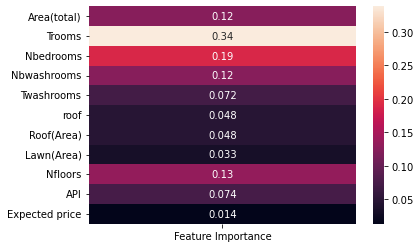

In [58]:
sns.heatmap(pd.DataFrame(a,b,columns=['Feature Importance']),annot=True);

# Insights

* As we can see from the above charts most of the houses in our dataset belong to D Grade and least in E Grade 
* Price is less if the number of total room is house is less mostly these houses comes in  C, D grade and price increase as number of rooms increase if the number of rooms in house is nine mostly they are from Grade A, B, C and price is more than 4k
* Most of the house have same area range between 300-350 with or without roof except E grade house there area is less then 310 for without roof and less than 290 with roof

* Area: In Grade A, B, C the area comes between 310-350, but for E grade house area is less than 300

* Rooms: Number of Rooms increases as Grade increases most of the A grade house has 9 rooms and E grade has 5 rooms

* Bedrooms: Number of Bedrooms increases as Grade increases most of the A grade house has 7-8 bedrooms and E grade has 2-3 bedrooms

* Bedroom Attached Washrooms: Number of Attached Washrooms increases as Grade increases most of the A grade house has 7-8 Washrooms and E grade has 1-2 Washrooms

* Washrooms: Number of Washrooms increases as Grade increases most of the A grade house has 8-9 Washrooms and E grade has 3-4 Washrooms

* Roof area: Most of the houses has almost same roof area except E grade because most of the E grade houses doesn’t have the roofs 

* Lawn area: Lawn area of E grade houses is comparatively less than other grade houses

* Total Floors: Number of Total Floors increases as Grade increases A grade house has 5-7 floors and E grade has 1-3 floors

* Air pollution index level: Air pollution index level of E grade houses is comparatively less than other grade houses

* Average number belonging: Average number belonging of E grade houses is comparatively less than other grade houses

* Expected Price: Expected price increases as Grade increases A grade house price is in between 4000-4500 and E grade price is somewhere around 3000

# Recommendation

## Below code will ask you few questions and based on that it will recommend you which Grade-House is best suited for you

In [180]:
svc_model = RandomForestClassifier()
X=df.iloc[:,1:13]
y =df['Grade']
X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.7)
svc_model.fit(X_train,y_train)
st = []
while True:
    Area= int(input("Enter Property area of the house in square meters you need:  "))
    st.append(Area)
    Total_Bedrooms1= int(input("Enter rooms you need:   "))
    st.append(Total_Bedrooms1)
    Total_Bedrooms= int(input("Enter bedrooms you need:   "))
    st.append(Total_Bedrooms)
    Nbwashrooms= int(input("Enter how many attached washrooms with bedroom required:  "))
    st.append(Nbwashrooms)
    Twashrooms= int(input("Enter how many Total number of washrooms required:  "))
    st.append(Twashrooms)
    roof= str(input("You want roof?   Yes/No:  ")).lower()
    if roof == 'yes': 
        roof = 1
        st.append(roof)
        Roof_a= np.random.randint(10,120,1)[0]
        st.append(Roof_a)
    else:
        st.append(0)
        st.append(0)
    Lawn_a = np.random.randint(50,80,1)[0]
    st.append(Lawn_a)
    Nfloors = int(input("Total floors in house"))
    st.append(Nfloors)
    API = np.random.randint(40,100,1)[0]
    st.append(API)
    ANB =np.random.randint(1,6,1)[0]
    st.append(ANB)
    Expected_price = int(input("Approximate cost price of the property:  "))
    st.append(Expected_price)
    break
a= svc_model.predict([st]) #using [] to convert 2 d array 
grade = encoder.inverse_transform([a])[0] # to get the actuall result 
print('\nYou can go for Grade',grade,'Houses based on your criteria')

Enter Property area of the house in square meters you need:  200
Enter rooms you need:   3
Enter bedrooms you need:   2
Enter how many attached washrooms with bedroom required:  3
Enter how many Total number of washrooms required:  3
You want roof?   Yes/No:  no
Total floors in house1
Approximate cost price of the property:  800

You can go for Grade E Houses based on your criteria
